<a href="https://colab.research.google.com/github/khadeejathasneem7/CognoRise-InfoTech/blob/main/Cognorise_Infotech_Project_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cognorise_Infotech_Project_Task2**

**KHADEEJA THASNEEM**

#**SPAM EMAIL DETECTION**

**A MACHINE LEARNING PROJECT FOR DETECTION OF SPAM EMAILS**

In [1]:
#Importing the sufficient python libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re #Regular Expression

In [2]:
#Importing the dataset
df=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
#To print the first 5 rows of the dataframe
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#To print the last 5 rows of the dataframe
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
#To print the diamension of the dataframe in (rows, columns) format
df.shape

(5572, 2)

In [6]:
#To print column names of the dataframe
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
#To print the datatype of each column
df.dtypes

Category    object
Message     object
dtype: object

In [8]:
#To check whether there is any missing values in the dataframe
df.isna().sum()

Category    0
Message     0
dtype: int64

In [9]:
#To get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
#Checking the distribution of the target variable
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

Text(0, 0.5, 'Count')

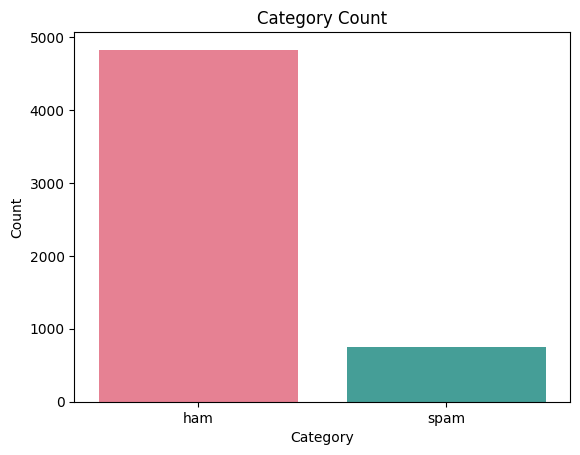

In [11]:
sns.countplot(x='Category',data=df,hue='Category',palette='husl')
plt.title('Category Count')
plt.xlabel('Category')
plt.ylabel('Count')

In [12]:
df['Category']=df['Category'].map({'spam':1,'ham':0})
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


#**NATURAL LANGUAGE PROCESSING STEPS**

In [13]:
#Importing essential Natural Language Toolkit (NLTK) libraries
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
#Assigning the column 'Message' to a variable msgs
msgs=df.Message
msgs

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [15]:
#Tokenization : Each sentance is converted into word-by-word data
#Here we need the data as word by word data separated by space...,
from nltk import TweetTokenizer
tk=TweetTokenizer()
msgs=msgs.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
msgs

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568              Will Ã ¼ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [16]:
#To remove special characters
#Regular Expression
msgs=msgs.str.replace('[^a-zA-Z0-9]+',' ')
msgs

<ipython-input-16-c11840a526b0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  msgs=msgs.str.replace('[^a-zA-Z0-9]+',' ')


0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in 2 a wkly comp to win FA Cup fina...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                   Will b going to esplanade fr home 
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i d...
5571                            Rofl Its true to its name
Name: Message, Length: 5572, dtype: object

In [17]:
#To collect words only with length above 3
#(just a method to select meaningful words)
from nltk.tokenize import word_tokenize
msgs=msgs.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
msgs

0       until jurong point crazy Available only bugis ...
1                                      lar Joking wif oni
2       Free entry wkly comp win Cup final tkts 21st M...
3                      dun say early hor already then say
4         Nah don think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569         Pity was mood for that any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: Message, Length: 5572, dtype: object

In [18]:
#Stemming : To find the root word
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
msgs=msgs.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
msgs

0       until jurong point crazi avail onli bugi great...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                      dun say earli hor alreadi then say
4           nah don think goe usf live around here though
                              ...                        
5567    this the 2nd time have tri contact have won th...
5568                                will go esplanad home
5569             piti was mood for that ani other suggest
5570    the guy did some bitch but act like interest b...
5571                                 rofl it true it name
Name: Message, Length: 5572, dtype: object

In [19]:
#Remove Stopwords
from nltk.corpus import stopwords
stop1=stopwords.words('english')
msgs=msgs.apply(lambda x:[i for i in word_tokenize(x) if i not in stop1]).apply(lambda x:" ".join(x))
msgs

0       jurong point crazi avail onli bugi great world...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                     go esplanad home
5569                                piti mood ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [20]:
#Vectorization : Converting to numerical
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(msgs)
print(train_data)

  (0, 6579)	0.20216031597468262
  (0, 999)	0.36596689778277197
  (0, 2952)	0.16965264899544422
  (0, 1758)	0.3091703141145051
  (0, 1531)	0.3493549619752681
  (0, 6747)	0.24533301256575607
  (0, 2989)	0.2017861574399963
  (0, 1533)	0.3091703141145051
  (0, 4474)	0.1750991615757075
  (0, 1183)	0.2737313043998896
  (0, 1957)	0.2834161703187832
  (0, 4767)	0.24988993515576846
  (0, 3543)	0.36596689778277197
  (1, 4472)	0.5884936620961707
  (1, 6673)	0.46469076328470776
  (1, 3512)	0.494457003144156
  (1, 3675)	0.4396020657733696
  (2, 70)	0.26961406544295236
  (2, 1070)	0.1919355645505515
  (2, 5025)	0.18542681454450735
  (2, 6321)	0.14233815390204066
  (2, 5773)	0.22578140384429926
  (2, 4982)	0.1893353125177682
  (2, 5062)	0.18542681454450735
  (2, 766)	0.25346248369348356
  :	:
  (5567, 4650)	0.23275121270305701
  (5567, 5025)	0.24602192076488918
  (5567, 4474)	0.17929202107361064
  (5568, 2473)	0.782681381846728
  (5568, 2914)	0.43953417232463426
  (5568, 3189)	0.4407034897404325
  (5

In [21]:
train_data.shape

(5572, 6885)

#**SEPARATING X AND Y**

In [22]:
x=train_data
y=df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

#**SPLITTING TO TRAINING AND TESTING DATA**

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
y_train

array([0, 0, 0, ..., 0, 0, 0])

#**MODEL CREATION USING K-NEAREST NEIGHBORS CLASSIFIER**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_prediction=knn.predict(x_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

#**PERFORMANCE EVALUATION**

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
#confusion matrix
matr=confusion_matrix(y_test,y_prediction)
print(matr)

[[1448    0]
 [ 181   43]]


In [26]:
#accuracy score
score=accuracy_score(y_test,y_prediction)
score

0.8917464114832536

In [27]:
#classification report
report=classification_report(y_test,y_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1448
           1       1.00      0.19      0.32       224

    accuracy                           0.89      1672
   macro avg       0.94      0.60      0.63      1672
weighted avg       0.90      0.89      0.86      1672



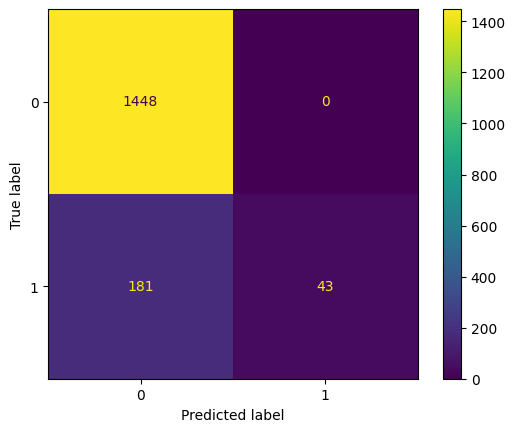

In [28]:
#confusion matrix display
labels=[0,1]
cmd=ConfusionMatrixDisplay(matr,display_labels=labels)
cmd.plot()
#0 : ham
#1 : spam

#**MODEL CREATION USING ADABOOSTING CLASSIFIER**

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator=DecisionTreeClassifier(max_depth=1)
abc=AdaBoostClassifier(base_estimator=base_estimator,n_estimators=50,random_state=42)
abc.fit(x_train,y_train)
y_prediction=abc.predict(x_test)
y_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 0])

In [30]:
#confusion matrix
matr=confusion_matrix(y_test,y_prediction)
print(matr)

[[1438   10]
 [  42  182]]


In [31]:
#accuracy score
score=accuracy_score(y_test,y_prediction)
score

0.9688995215311005

In [32]:
#classification report
report=classification_report(y_test,y_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1448
           1       0.95      0.81      0.88       224

    accuracy                           0.97      1672
   macro avg       0.96      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



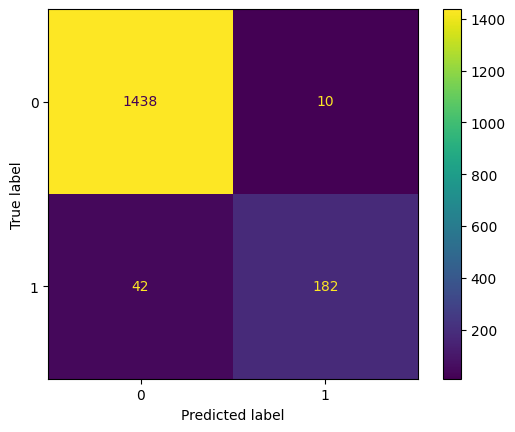

In [33]:
#confusion matrix display
labels=[0,1]
cmd=ConfusionMatrixDisplay(matr,display_labels=labels)
cmd.plot()
#0 : ham
#1 : spam

#**MODEL CREATION USING RANDOM FOREST CLASSIFIER, LOGISTIC REGRESSION AND THEN PERFORMANCE EVALUATION**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
rfc=RandomForestClassifier(n_estimators=5,criterion='entropy')
lr=LogisticRegression(solver='saga',max_iter=100,class_weight='balanced')

In [36]:
lst=[rfc,lr]
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_prediction=i.predict(x_test)
  print(confusion_matrix(y_test,y_prediction))
  print(accuracy_score(y_test,y_prediction))
  print(classification_report(y_test,y_prediction))

RandomForestClassifier(criterion='entropy', n_estimators=5)
[[1448    0]
 [  40  184]]
0.9760765550239234
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       1.00      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672

LogisticRegression(class_weight='balanced', solver='saga')
[[1428   20]
 [  20  204]]
0.9760765550239234
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.91      0.91      0.91       224

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672

